<a href="https://colab.research.google.com/github/dphi-official/Bootcamp-de-sur-la-Science-des-donn-es/blob/master/Semaine%204/r%C3%A9gression%20logistique%20multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Présentation de la régression logistique multi-classes
Nous avons déjà découvert la régression logistique au cours de la [semaine # 3_Day # 6](https://www.google.com/url?q=https://docs.google.com/presentation/d/10mkWll_9s8LkZpy-SzRWQjFr2ay6VppgpjkBVs2HSvM/edit?usp%3Dsharing&sa=D&ust=1592317719588000&usg=AFQjCNFKHARql8iSSd6XH09heRI58Gkk7Q) et construisez un modèle de régression logistique sur les données d'assurance dans [ce cahier](https://github.com/dphi-official/Data_Science_Bootcamp/blob/master/Week3/Logistic_Regression/Logistic_Regression_Insurance.ipynb). Dans le cahier précédent, nous avions construit une régression logistique binaire car la variable cible (c.-à-d. Assurance_achetée) dans les données d'assurance a deux classes 1 (assurance achetée) et 0 (n'a pas acheté d'assurance). Dans ce cahier, nous parlerons de la régression logistique multi-classes.

**Régression logistique multi-classes:** Ici, la variable cible a plus de deux classes / catégories possibles. Par exemple, le salaire d'un employé peut être classé dans la catégorie **«faible», «moyen» et «élevé»**. Il existe deux types de régression logistique multi-classes:

1. **Régression logistique multinomiale:**
La variable cible a trois classes / catégories ou plus qui ne sont pas dans un ordre particulier. Donc, il y a trois catégories nominales ou plus.
Exemples: Fruits (pomme, mangue, orange et banane), profession (par exemple, avec cinq groupes: chirurgien, médecin, infirmière, dentiste, thérapeute)

2. **Régression logistique ordinale:**
La variable cible comprend au moins trois catégories ordinales. Donc, il y a un ordre intrinsèque impliqué dans les catégories.
Par exemple, les performances des élèves peuvent être classées comme médiocres, moyennes, bonnes et excellentes, le salaire d'un employé peut être classé comme **'faible', 'moyen' et 'élevé'**

## Agenda
* À propos de l'ensemble de données
* Chargement des bibliothèques et des données
* Comprendre les données
* Séparation des variables d'entrée et de sortie
* Fractionnement des données en train et ensembles de test
* Construire le modèle
*  Prédiction
* Vérifiez le modèle Performace


## À propos de l'ensemble de données
J'espère que vous vous êtes tous souvenus de l'ensemble de données sur le vin sur lequel nous avons effectué une analyse exploratoire des données. Ici, nous ne prendrons que les données sur le vin rouge. Compte tenu de différents tests physico-chimiques, nous voulons prédire la qualité du vin dans une plage de 1 à 10.

## Chargement des bibliothèques
Toutes les fonctionnalités Python ne sont pas chargées dans notre environnement de travail par défaut (même si elles sont déjà installées dans votre système). Ainsi, nous importons chaque bibliothèque que nous voulons utiliser.

En science des données, numpy et pandas sont les bibliothèques les plus couramment utilisées. Numpy est nécessaire pour les calculs tels que les moyennes, les médianes, les racines carrées, etc. Pandas est utilisé pour le traitement des données et les trames de données. Nous avons choisi des noms d'alias pour nos bibliothèques par souci de commodité (numpy -> np et pandas -> pd).

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Chargement des données
Le module Pandas est utilisé pour lire les fichiers. Nous avons nos données au format «.csv». Nous utiliserons la fonction 'read_csv ()' pour charger les données.

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

## Comprendre les données
Voyons à quoi ressemblent nos données.

In [3]:
# Red Wine
red_wine_data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Verschiedene Attribute
**Variables d'entrée (basées sur des tests physico-chimiques):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9.  pH
10.  sulphates
11.  alcohol
**Variable de sortie (basée sur les données sensorielles):**
12. quality (score between 0 and 10)

In [5]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Voyons la variable cible «qualité».

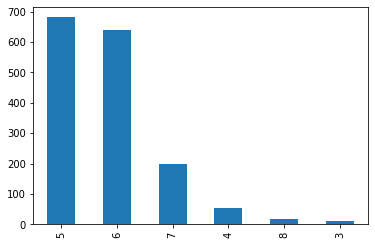

In [6]:
red_wine_data.quality.value_counts().plot(kind = 'bar')

On peut observer ici plus de vins de qualité moyenne que de mauvaise qualité et de bonne qualité. C'est ce que nous avions observé dans notre cahier EDA de données sur le vin.

Nous avons déjà fait la partie EDA de cet ensemble de données dans notre cahier précédent. Nous n'allons donc pas nous plonger davantage dans l'EDA ici. Séparons les variables indépendantes et dépendantes.

### Séparation des fonctionnalités d'entrée et des fonctionnalités de sortie
Avant de créer un modèle d'apprentissage automatique, nous séparons toujours les variables d'entrée et les variables de sortie. Les variables d'entrée sont les quantités dont les valeurs sont modifiées naturellement dans une expérience, tandis que la variable de sortie est celle dont les valeurs dépendent des variables d'entrée. Ainsi, les variables d'entrée sont également appelées variables indépendantes car leurs valeurs ne dépendent d'aucune autre quantité, et les variables de sortie sont également appelées variables dépendantes car ses valeurs dépendent d'autres variables, c'est-à-dire les variables d'entrée. Comme ici dans ces données, nous pouvons voir que le fait qu'une personne achète une assurance ou non dépend de l'âge de cette personne

Par convention, les variables d'entrée sont représentées par «X» et les variables de sortie par «y».

In [7]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1)   # her we are droping the quality feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = red_wine_data.quality             # Output/Dependent variable

In [8]:
# Let's check the shapes of X and y
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (1599, 11) Dimension:  2
Shape:  (1599,) Dimension:  1


Nous avions discuté dans le cahier précédent que la variable d'entrée doit être un tableau 2D et la cible d'un tableau 1D.

### Diviser les données en train et ensemble de test
Nous voulons vérifier les performances du modèle que nous avons construit. À cette fin, nous divisons toujours (à la fois les données d'entrée et de sortie) les données données en ensemble d'apprentissage qui sera utilisé pour entraîner le modèle, et ensemble de test qui sera utilisé pour vérifier avec quelle précision le modèle prévoit les résultats.

Pour cela, nous avons une classe appelée 'train_test_split' dans le module 'sklearn.model_selection'.

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Modèle de bâtiment
Maintenant, nous sommes enfin prêts et nous pouvons former le modèle.

Tout d'abord, nous devons importer notre modèle - Régression logistique (encore une fois, en utilisant la bibliothèque sklearn).

Ensuite, nous alimenterions le modèle à la fois avec les données (X_train) et les réponses pour ces données (y_train)

In [11]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [12]:
log_model = LogisticRegression()

### !!!Attention
Les différentes colonnes de cet ensemble de données sont à des échelles différentes. On peut obtenir «ConvergenceWarning» ici lors de l'ajustement du modèle. Veuillez ignorer ceci pour ici. Si vous souhaitez vous débarrasser de cette erreur, mettez à l'échelle vos données.

In [13]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

L'entraînement se déroule dans la troisième ligne (la fonction «fit»).

**Point à noter:**
LogisticRegression (C = 1.0, class_weight = None, dual = False, fit_intercept = True,
                    intercept_scaling = 1, l1_ratio = Aucun, max_iter = 100,
                    multi_class = 'auto', n_jobs = Aucun, pénalité = 'l2',
                    random_state = Aucun, solveur = 'lbfgs', tol = 0,0001, verbeux = 0,
                    warm_start = Faux)

Si vous observez clairement la sortie ci-dessus que vous avez obtenue après avoir ajusté le modèle, il existe un argument appelé «multi_class» qui est «auto» par défaut. Si vous revenez en arrière et voyez les données d'assurance, l'argument «multi_class» était toujours «auto». Ici, «auto» effectue une sélection automatique de binaire et multinomial. Si les données sont une classification binaire 'auto' effectue une classification binaire, et si les données sont une classification multiple, 'auto' effectue une classification multiple.

Remarque: vous pouvez également changer «auto» en «ovr». Ici, «ovr» ne fait que des classifications binaires.

Plus de détails: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Prédiction
Maintenant, le modèle de régression logistique (c'est-à-dire log_model) est formé à l'aide des données X_train et y_trian. Prédisons la valeur cible (c'est-à-dire la qualité du vin) pour les données X_test. Nous utilisons la méthode "predire ()" pour la prédiction.

In [14]:
predictions = log_model.predict(X_test)

Nous avons déjà des valeurs cibles réelles (c'est-à-dire y_test) pour X_test. Comparons y_test et la valeur prédite pour X_test par notre log_model.

In [15]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [16]:
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6,

### Performance du modèle
Nous pouvons également vérifier la précision de notre modèle en utilisant la classe 'precision_score' de 'sklearn.metrics'.

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 139,  56,   0,   0],
       [  0,   0,  77, 121,   2,   0],
       [  0,   0,   4,  56,   1,   0],
       [  0,   0,   0,   5,   1,   0]])

Encore une fois, si vous observez ici, les faux positifs de classe (au-dessus de la diagonale principale) et les faux négatifs de classe (en dessous de la diagonale principale) sont presque symétriques. Le score de précision est donc une métrique importante ici.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, predictions)

0.54375

Notre modèle prévoit des résultats corrects à 54,37%.

**Merci d'avoir lu le cahier !!!**

## Exercice
Utilisez le lien de données brutes des données d'iris: https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv

**Des exercices**
* Modèle de régression logistique du train pour cet ensemble de données
* Prédire la sortie pour les données de test
* Découvrez la précision du modèle que vous avez construit.